# Blood Glucose Control - EDA

**Name:** Sachit Singh Juneja



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style='whitegrid', context='notebook')

# Define the data directory
data_dir = os.path.join(os.getcwd(), '../', 'data')

# Get all CSV files in the data directory
file_paths = glob.glob(os.path.join(data_dir, '*.csv'))

# Initialize an empty list to store data frames
dfs = []

# Read and concatenate data
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    if 'gluroo_' in file_name:
        user_id = file_name.split('_')[-1].split('.')[0]
    else:
        user_id = 'unknown'
    df_temp = pd.read_csv(file_path)
    df_temp['PWD_ID'] = user_id
    dfs.append(df_temp)

# Combine all data frames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Convert 'date' to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')

# Convert 'bgl' to numeric
combined_df['bgl'] = pd.to_numeric(combined_df['bgl'], errors='coerce')

# Drop rows with missing 'date' or 'bgl'
combined_df = combined_df.dropna(subset=['date', 'bgl'])

# Reset index after dropping rows
combined_df = combined_df.reset_index(drop=True)

# Preview the cleaned data
combined_df.head()


,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,PWD_ID
0,2024-05-01 00:00:27.029000-05:00,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
1,2024-05-01 00:05:27.183000-05:00,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
2,2024-05-01 00:10:26.949000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
3,2024-05-01 00:15:27.180000-05:00,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
4,2024-05-01 00:20:27.021000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030


### Additional Data Preprocessing

In [19]:
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce', utc=True)

# Drop rows with null 'date' values
combined_df = combined_df.dropna(subset=['date']).reset_index(drop=True)

# Verify the 'date' column dtype
print(f"Date column data type: {combined_df['date'].dtype}")

# Extract date-related features
combined_df['hour'] = combined_df['date'].dt.hour
combined_df['day_of_week'] = combined_df['date'].dt.day_name()

# Create flags for different events
combined_df['insulin_dose'] = combined_df['msg_type'] == 'DOSE_INSULIN'
combined_df['meal'] = combined_df['msg_type'] == 'ANNOUNCE_MEAL'
combined_df['snack'] = combined_df['msg_type'] == 'INTERVENTION_SNACK'

# Fill NaN values in 'food_g' and 'dose_units' with zeros
combined_df['food_g'] = combined_df['food_g'].fillna(0)
combined_df['dose_units'] = combined_df['dose_units'].fillna(0)

# Preview the updated data
combined_df.head()


Date column data type: datetime64[ns, UTC]


,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,...,fp_bgl,message_basal_change,__typename,trend,PWD_ID,hour,day_of_week,insulin_dose,meal,snack
0,2024-05-01 05:00:27.029000+00:00,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,Reading,FLAT,500030,5,Wednesday,False,False,False
1,2024-05-01 05:05:27.183000+00:00,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,Reading,FLAT,500030,5,Wednesday,False,False,False
2,2024-05-01 05:10:26.949000+00:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,Reading,FLAT,500030,5,Wednesday,False,False,False
3,2024-05-01 05:15:27.180000+00:00,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,Reading,FLAT,500030,5,Wednesday,False,False,False
4,2024-05-01 05:20:27.021000+00:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,Reading,FLAT,500030,5,Wednesday,False,False,False


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

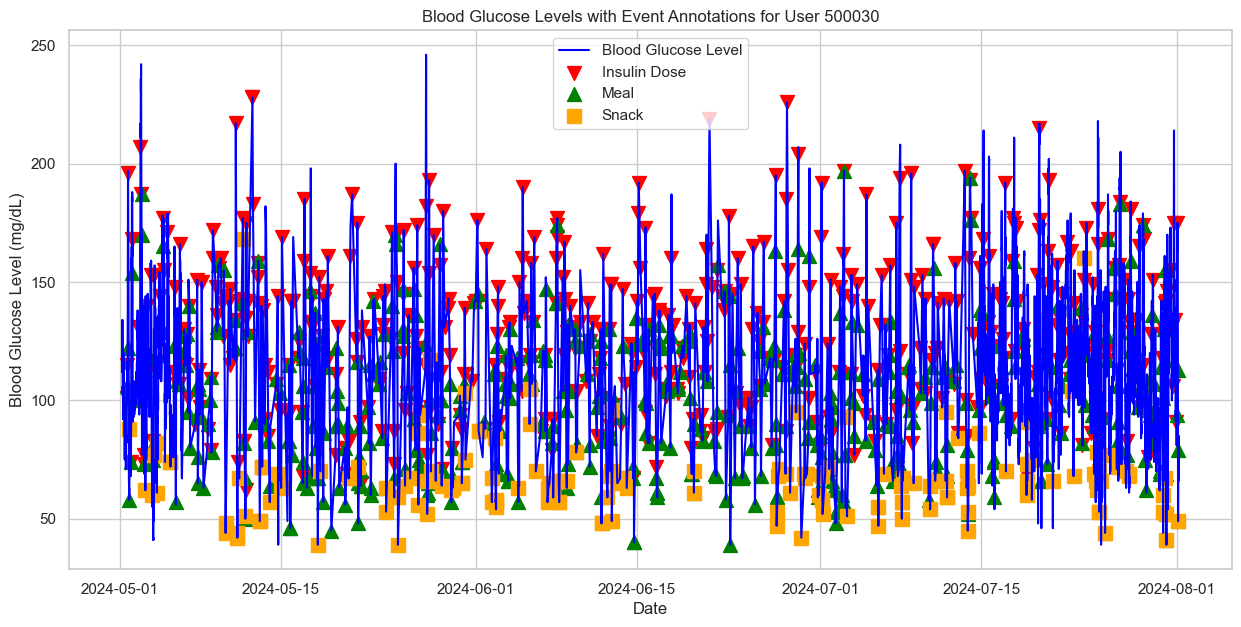

In [20]:
# Select a user for detailed analysis
user_id = combined_df['PWD_ID'].unique()[0]
user_df = combined_df[combined_df['PWD_ID'] == user_id]

# Plotting
plt.figure(figsize=(15, 7))

# Plot blood glucose levels
plt.plot(user_df['date'], user_df['bgl'], label='Blood Glucose Level', color='blue')

# Annotate insulin doses
insulin_events = user_df[user_df['insulin_dose']]
plt.scatter(insulin_events['date'], insulin_events['bgl'], color='red', label='Insulin Dose', marker='v', s=100)

# Annotate meals
meal_events = user_df[user_df['meal']]
plt.scatter(meal_events['date'], meal_events['bgl'], color='green', label='Meal', marker='^', s=100)

# Annotate snacks
snack_events = user_df[user_df['snack']]
plt.scatter(snack_events['date'], snack_events['bgl'], color='orange', label='Snack', marker='s', s=100)

# Customize the plot
plt.title(f'Blood Glucose Levels with Event Annotations for User {user_id}')
plt.xlabel('Date')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.legend()
plt.show()


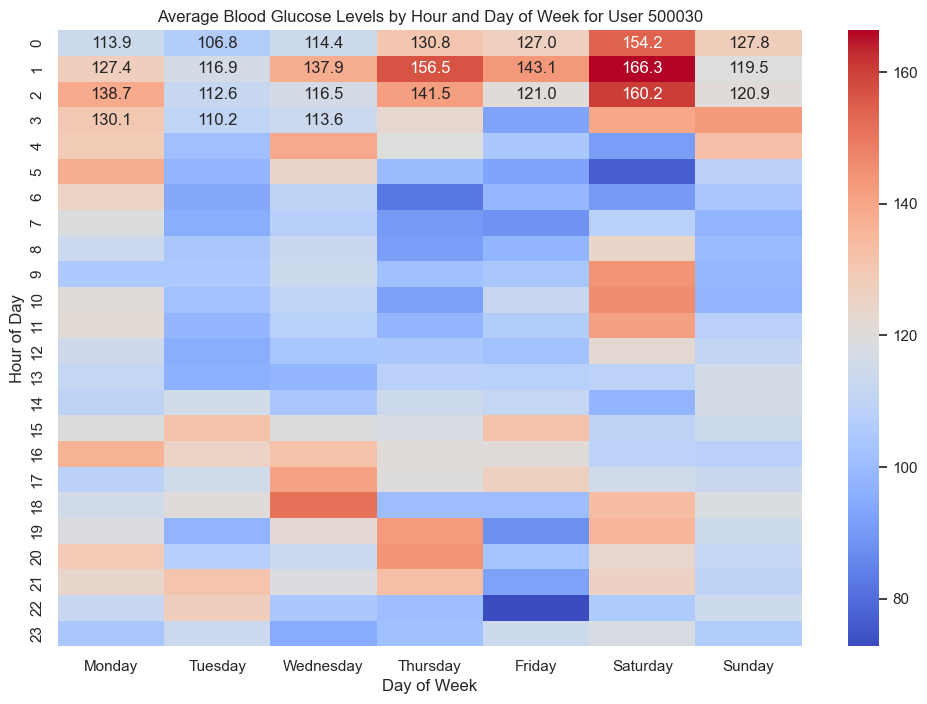

In [21]:
# Pivot the data to create a matrix for the heatmap
heatmap_data = user_df.pivot_table(values='bgl', index='hour', columns='day_of_week', aggfunc='mean')

# Reorder the columns to start the week on Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[days_order]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title(f'Average Blood Glucose Levels by Hour and Day of Week for User {user_id}')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()


### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. How do different events (such as insulin dosing, meals, and snacks) quantitatively affect blood glucose levels over time for individuals with Type 1 Diabetes? From the visualizations, we can see temporal associations between events and changes in blood glucose levels. Is there a way to model or predict these effects to improve management strategies?

2. Are there consistent patterns in blood glucose levels related to the time of day or day of the week, and how can understanding these patterns help optimize insulin dosing schedules or dietary planning? The heatmap suggests there may be times when blood glucose levels are predictably higher or lower. How can individuals with diabetes and their healthcare providers use this information to adjust treatment plans?


### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`